# 과제 목표

1. **PCA의 작동 원리**를 이해하고, 차원 축소의 장점과 한계를 파악한다.
2. 제공된 데이터셋을 PCA로 변환하고, **주성분 분석 결과**를 시각화한다.
3. PCA 적용 전후 **랜덤포레스트(Random Forest)** 모델의 성능을 비교하여 차원 축소가 예측 성능에 미친 영향을 파악한다.



## 1. 데이터 준비
- 제공된 데이터셋(`car_evaluation.csv`)을 업로드하고 필요한 전처리를 수행
- 범주형 데이터를 인코딩하여 숫자로 변환
- PCA 적용을 위해 데이터를 정규화 (예: `StandardScaler` 사용)

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
## 드라이브 마운트 하기
%cd '/content/drive/MyDrive/GDGoC AI'

/content/drive/MyDrive/GDGoC AI


In [35]:
## csv파일 읽기
import pandas as pd
data = pd.read_csv('car_evaluation.csv')
data

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [36]:
##범주형 데이터를 숫자로 변환하기 (sklearn의 LabelEncoder를 이용)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
encoding_columns = ['vhigh', 'vhigh.1', '2', '2.1', 'small', 'low', 'unacc']
for col in encoding_columns:
  data[col] = le.fit_transform(data[col])

In [37]:
##데이터 열 이름 알기 쉽게 바꾸기
data.columns=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safty', 'evaluation_grade']
data

,buying,maint,doors,persons,lug_boot,safty,evaluation_grade
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2
...,...,...,...,...,...,...,...
1722,1,1,3,2,1,2,1
1723,1,1,3,2,1,0,3
1724,1,1,3,2,0,1,2
1725,1,1,3,2,0,2,1


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## 평가등급을 target(y), 나머지를 features(x)로 잡기
x_col = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safty']
y_col = 'evaluation_grade'

In [40]:
## PCA(주성분 분석)을 위한 단위 데이터 정규화
from sklearn.preprocessing import StandardScaler

### 1. 데이터 표준화
scaler = StandardScaler()
x_scaled = scaler.fit_transform(data[x_col])  # 평균과 표준편차를 학습 후 표준

## 2. PCA 적용 및 시각화
- PCA를 사용하여 데이터를 **2차원** 또는 **3차원으로 축소**
- 축소된 데이터를 산점도(Scatter Plot)로 시각화하여 데이터 분포를 확인

In [42]:
from sklearn.decomposition import PCA
## 2차원으로 축소하기(2개의 주 성분을 찾아서 축소)
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)  # PCA 학습과 변환
print(x_pca.shape) #x_train_pca 데이터의 모양(1381행 2열)

(1727, 2)


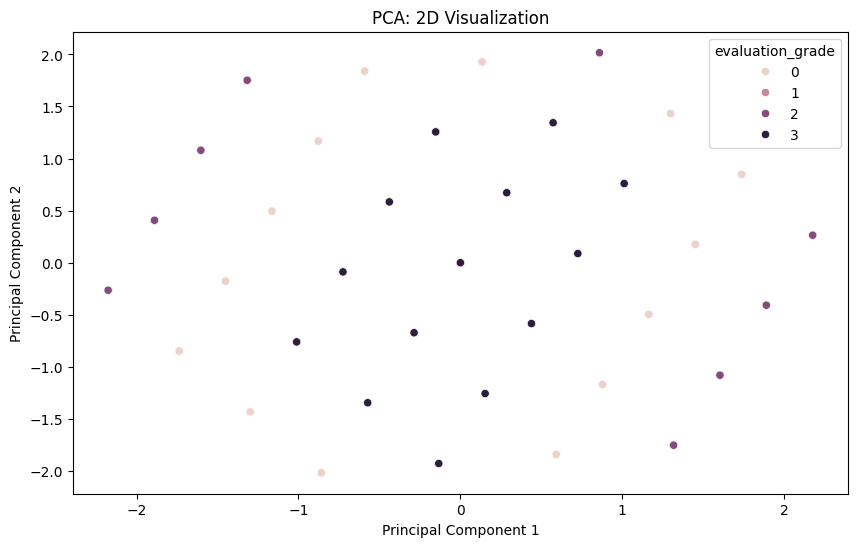

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
# PCA로 2차원으로 축소한 데이터를 산점도로 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(x= x_pca[:, 0], y =x_pca[:, 1], hue= data[y_col])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: 2D Visualization')

plt.show()

## 3. PCA 적용 전후 랜덤포레스트 모델 성능 비교
- PCA를 적용하기 전의 데이터를 사용하여 **랜덤포레스트** 모델을 학습하고 성능(정확도)을 평가
- PCA를 적용한 데이터를 사용하여 동일한 모델을 학습하고 성능을 평가

In [44]:
from sklearn.ensemble import RandomForestClassifier
## 데이터 나누기(train과 test를 8:2)
x_train, x_test, y_train, y_test = train_test_split(data[x_col], data[y_col], test_size=0.2, random_state=42)

## PrePCA 랜덤포레스트 모델 학습시키기

## 랜덤 포레스트 모델에 x와 y의 train값 학습
PrePCA = RandomForestClassifier()
PrePCA.fit(x_train, y_train)
## x의 test값을 가지고 y값 예측
PrePCA_pred = PrePCA.predict(x_test)

## 예측한 것을 가지고 y_test와 비교하며 정확도 계산
PrePCA_accuracy = accuracy_score(y_test, PrePCA_pred)
print(f'PrePCA RFC Accuracy: {PrePCA_accuracy}')

PrePCA RFC Accuracy: 0.9682080924855492


In [47]:
## PostPCA 랜덤포레스트 모델 학습시키기
x_pca_train, x_pca_test, _, _ = train_test_split(x_pca, data[y_col], test_size=0.2, random_state=42)

## 랜덤 포레스트 모델에 PCA적용된 x_pca_train와 위의 셸의 y_train값 학습
PostPCA = RandomForestClassifier()
PostPCA.fit(x_pca_train, y_train)
## x의 test값을 가지고 y값 예측
PostPCA_pred = PostPCA.predict(x_pca_test)

## 예측한 것을 가지고 y_test와 비교하며 정확도 계산
PostPCA_accuracy = accuracy_score(y_test, PostPCA_pred)
print(f'RandomForestClassifier Accuracy: {PostPCA_accuracy}')

RandomForestClassifier Accuracy: 0.6791907514450867


## 4. 결과 시각화
- **PCA 축소 결과 시각화**: 2D/3D 산점도를 통해 데이터 분포를 시각화
- **모델 성능 비교**: PCA 적용 전후의 랜덤포레스트 모델 정확도를 막대그래프로 시각화
- **주성분 기여도 분석**: 각 주성분이 데이터 분산에 기여한 비율(Explained Variance Ratio)을 막대그래프로 시각화

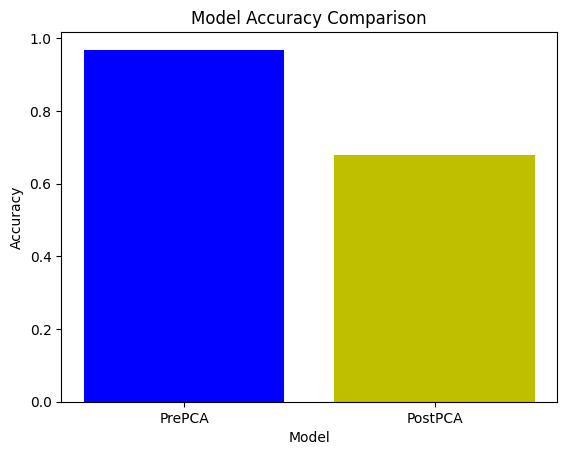

In [52]:
## 모델 성능 비교(PCA 전 후 RF모델 정확도)
plt.bar(['PrePCA', 'PostPCA'], [PrePCA_accuracy, PostPCA_accuracy], color =['b', 'y'] )
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()

주성분1 기여도0.16684055954865162
주성분 2 기여도 0.1668405595486514


Text(0.5, 1.0, 'Explained Variance Ratio by Principal Components')

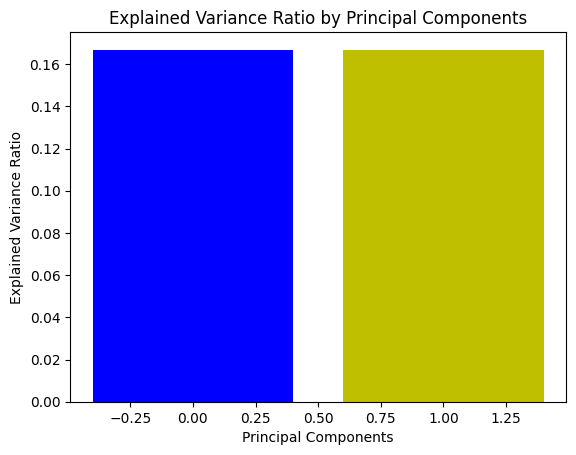

In [58]:
## 주성분 기여도 분석
print(f"주성분1 기여도{pca.explained_variance_ratio_[0]}\n주성분 2 기여도 {pca.explained_variance_ratio_[1]}")
plt.bar(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_,color = ['b', 'y'])
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Components')